In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [5]:
# Load the multipliers dataset
multipliers_df = pd.read_csv('multipliers.csv')

# Quick preview
multipliers_df.head()



,Multiplier
0,2.80
1,6.55
2,1.10
3,1.06
4,1.88


In [24]:
# Define the number of past values to use as features
num_past = 10

# Create feature and target columns
X, y = [], []
for i in range(len(multipliers_df) - num_past):
    X.append(multipliers_df['Multiplier'].values[i:i + num_past])
    y.append(multipliers_df['Multiplier'].values[i + num_past])

X = np.array(X)
y = np.array(y)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=10, max_depth=10, n_jobs=-1, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)



RandomForestRegressor(max_depth=10, n_estimators=10, n_jobs=-1, random_state=42)

(585885, 10)

In [27]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 19.101939992802475
Mean Squared Error: 780421.3377186896
R-squared: -0.08465474877439694


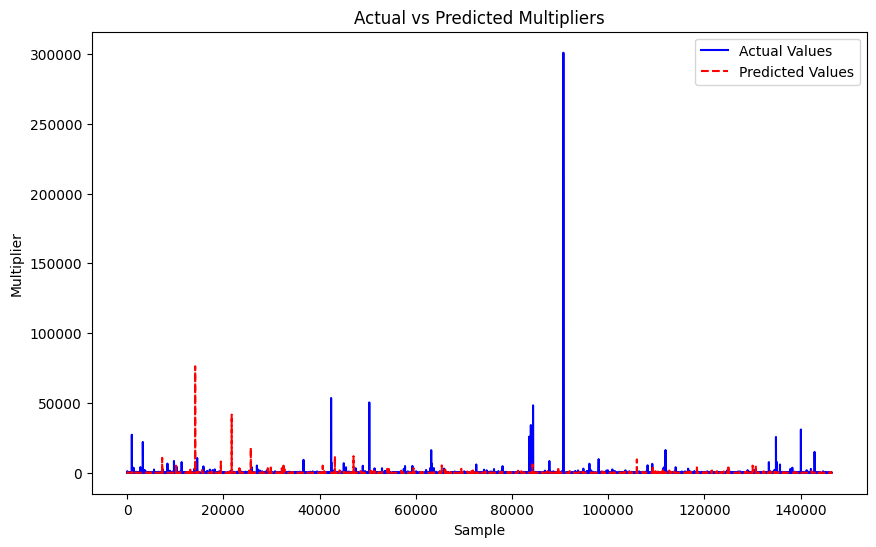

In [28]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='dashed')
plt.xlabel('Sample')
plt.ylabel('Multiplier')
plt.legend()
plt.title('Actual vs Predicted Multipliers')
plt.show()


In [37]:
real_time_data = np.array([1.5,2.0,28.28,4.2,1.9])  # Replace with actual 100 feature values
real_time_data = real_time_data.reshape(1, -1)


In [42]:
import numpy as np

# Example real-time data (make sure it has 100 features)
real_time_data = np.array([ 6.42, 2.35,2.21,2.45,1.50,1.13,1.49,1.00,2.52, 1.90] )  # Replace 10 with the actual remaining 95 values if available
real_time_data = real_time_data.reshape(1, -1)

# Predict the next multiplier
try:
    next_prediction = model.predict(real_time_data)
    print("Predicted next multiplier:", next_prediction[0])
except ValueError as e:
    print("Error:", e)


Predicted next multiplier: 8.327408166157007
